In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import sys
import os
import pandas as pd
import scvelo as scv
# Add the parent directory to the system path
parent_directory = os.path.abspath(os.path.join(os.getcwd(), '../../'))
sys.path.append(parent_directory)

from plotting import plot_phase_plane, plot_velocity_expression

datasets = ["forebrain", "pancreas", "gastrulation_erythroid", "dentategyrus_lamanno_P5"]
dataset = "forebrain"
cell_type_key = "Clusters"
model_name = "imVelo"
K = 31

adata = sc.read_h5ad(f"../../benchmark/{model_name}/{dataset}/{model_name}_{dataset}.h5ad")

os.makedirs(f"plots/{dataset}/{model_name}/", exist_ok=True)

In [3]:
adata.obsm["ve"].shape

(1720, 64)

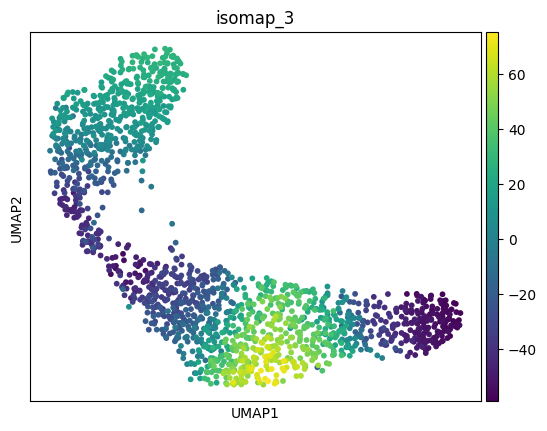

In [8]:
sc.pl.umap(adata, color="isomap_3")

In [4]:
adata = scv.datasets.gastrulation_erythroid()

In [3]:
#adata = adata[adata.obs["stage"]=="E7.0"]
#sc.pl.umap(adata,color="celltype", title="Gastrulation Eryhtroid - Embrionic Day E8.25")

In [5]:
import pandas as pd

# Cross-tabulate counts of cell types across stages
counts = pd.crosstab(adata.obs["celltype"], adata.obs["stage"])

# Calculate percentages by dividing counts by their respective column sums and multiplying by 100
percentages = counts.div(counts.sum(axis=0), axis=1) * 100

# Combine counts and percentages into a single DataFrame with pairs of columns
summary = pd.DataFrame()
for stage in counts.columns:
    summary[(stage, 'Total Cells')] = counts[stage]
    summary[(stage, 'Percent')] = percentages[stage]

# Round the percentages for readability
summary = summary.round({'Percent': 2})

# Add a total row at the end
summary.loc['Total'] = [counts[stage].sum() if col == 'Total Cells' else 100 for stage, col in summary.columns]

# Display the result
summary


E7.0                   E7.25              \
                    Total Cells     Percent Total Cells     Percent   
celltype                                                              
Blood progenitors 1          19   44.186047          61   93.846154   
Blood progenitors 2          24   55.813953           2    3.076923   
Erythroid1                    0    0.000000           0    0.000000   
Erythroid2                    0    0.000000           1    1.538462   
Erythroid3                    0    0.000000           1    1.538462   
Total                        43  100.000000          65  100.000000   

                           E7.5                   E7.75              \
                    Total Cells     Percent Total Cells     Percent   
celltype                                                              
Blood progenitors 1         201   42.675159         162    9.479228   
Blood progenitors 2         268   56.900212         940   55.002926   
Erythroid1                    2    0.424628         582   34.055003   
Erythroid2                    0    0.000000          25    1.462844   
Erythroid3                    0    0.000000           0    0.000000   
Total                       471  100.000000        1709  100.000000   

                           E8.0                   E8.25              \
                    Total Cells     Percent Total Cells     Percent   
celltype                                                              
Blood progenitors 1         109    3.877624          34    2.005900   
Blood progenitors 2         983   34.969762         156    9.203540   
Erythroid1                 1544   54.927072         728   42.949853   
Erythroid2                  169    6.012095         605   35.693215   
Erythroid3                    6    0.213447         172   10.147493   
Total                      2811  100.000000        1695  100.000000   

                           E8.5              
                    Total Cells     Percent  
celltype                                     
Blood progenitors 1          37    1.224760  
Blood progenitors 2          87    2.879841  
Erythroid1                   73    2.416418  
Erythroid2                  306   10.129096  
Erythroid3                 2518   83.349884  
Total                      3021  100.000000

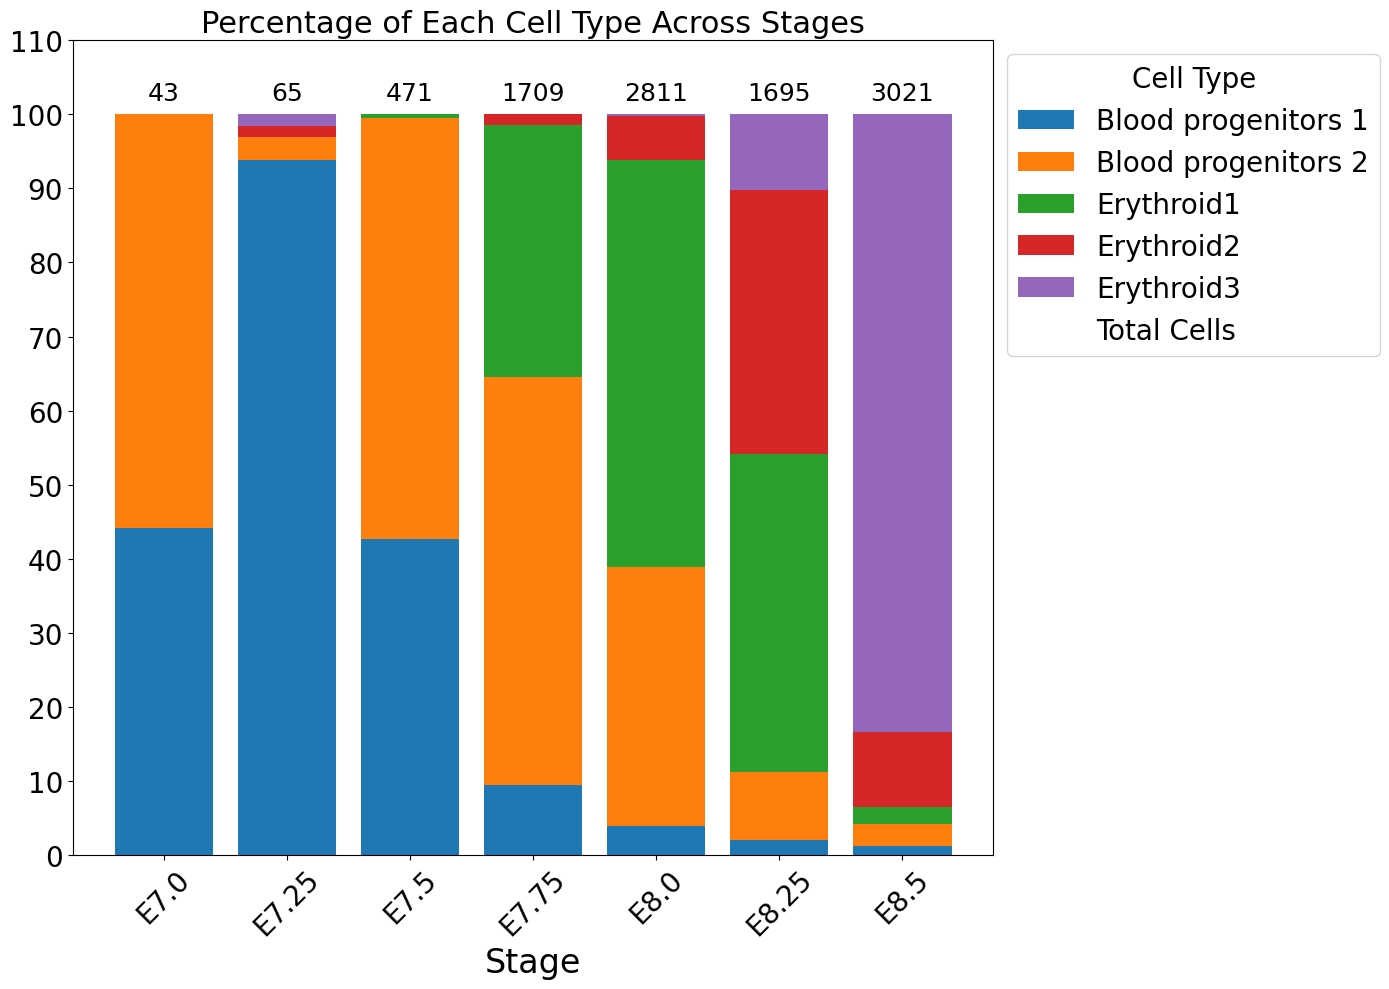

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Cross-tabulate counts of cell types across stages
counts = pd.crosstab(adata.obs["celltype"], adata.obs["stage"])

# Calculate the total counts for each stage across all cell types
total_counts_per_stage = counts.sum(axis=0)

# Calculate the percentage of each cell type relative to all cell types for each stage
celltype_percent = (counts / total_counts_per_stage) * 100

# Create the stacked bar plot using matplotlib directly
fig, ax = plt.subplots(figsize=(14, 10))  # Increased figure size for readability

# Plot each cell type separately to form a stacked bar
bottom = None
for cell_type in celltype_percent.index:
    ax.bar(celltype_percent.columns, celltype_percent.loc[cell_type],
           label=cell_type, bottom=bottom)
    # Update bottom for stacking
    if bottom is None:
        bottom = celltype_percent.loc[cell_type]
    else:
        bottom += celltype_percent.loc[cell_type]

# Customize the plot with increased font sizes
ax.set_xlabel('Stage', fontsize=24)
ax.set_title('Percentage of Each Cell Type Across Stages', fontsize=22)
ax.set_xticks(range(len(celltype_percent.columns)))
ax.set_xticklabels(celltype_percent.columns, rotation=45, fontsize=20)
ax.set_ylim(0, 110)  # Extend y-axis to accommodate full 100%

# Set y-ticks to integers
ax.set_yticks(range(0, 111, 10))
ax.set_yticklabels([str(i) for i in range(0, 111, 10)], fontsize=20)

# Add the total number of cells on top of each bar
for i, stage in enumerate(celltype_percent.columns):
    total_cells = total_counts_per_stage[stage]
    ax.text(i, 102, f'{total_cells}', ha='center', fontsize=18)  # Position above 100%

# Add a legend entry with only a point or a number for total cells
handles, labels = ax.get_legend_handles_labels()
total_cells_overall = total_counts_per_stage.sum()  # Calculate the overall total
# Add a single point or number for "Total Cells"
handles.append(plt.Line2D([0], [0], color='None', label=f'Total Cells', markersize=10, linestyle='None'))
ax.legend(handles=handles, title='Cell Type', fontsize=20, title_fontsize=20, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()
